In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Resources/LE/life_expectancy.csv", encoding="ISO-8859-1")
df = df.set_index('Countries')
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,49.9,50.6,51.3,52,52.5,53.1,53.5,54,54.5,55,...,60.2,60.8,61.2,61.7,62.1,62.5,62.9,63.3,63.7,64.0
Albania,71.8,71.8,71.8,71.9,72,72.2,72.5,72.8,73.2,73.6,...,75.9,76.3,76.7,77,77.4,77.7,78,78.2,78.3,78.5
Algeria,66.7,67,67.2,67.5,67.8,68.1,68.5,68.9,69.4,69.8,...,74,74.4,74.7,74.9,75.2,75.4,75.6,75.9,76.1,76.3
Andorra,76.5,76.7,76.9,77,77.2,77.4,77.6,77.9,78.2,78.5,...,80.6,80.7,80.8,80.9,81.1,81.2,81.3,81.4,81.5,81.7
Angola,41.7,41.9,42.1,42.3,42.7,43.1,43.7,44.4,45.2,46.1,...,56.2,57.2,58.2,59,59.8,60.4,60.9,61.2,61.5,61.8
Antigua and Barbuda,71.4,71.6,71.8,72,72.2,72.4,72.7,72.9,73.1,73.3,...,75.1,75.2,75.4,75.6,75.7,75.9,76,76.2,76.4,76.5
Argentina,71.6,71.8,72,72.3,72.5,72.7,72.9,73.2,73.4,73.6,...,75.3,75.4,75.6,75.8,75.9,76.1,76.3,76.4,76.6,76.7
Armenia,67.9,67.9,68,68.2,68.5,68.9,69.4,69.9,70.4,70.9,...,72.9,73.1,73.3,73.6,73.8,74,74.3,74.4,74.6,74.8
Australia,76.9,77.2,77.5,77.8,78,78.3,78.5,78.8,79,79.3,...,81.6,81.7,81.9,82.1,82.2,82.4,82.6,82.7,82.9,83.1


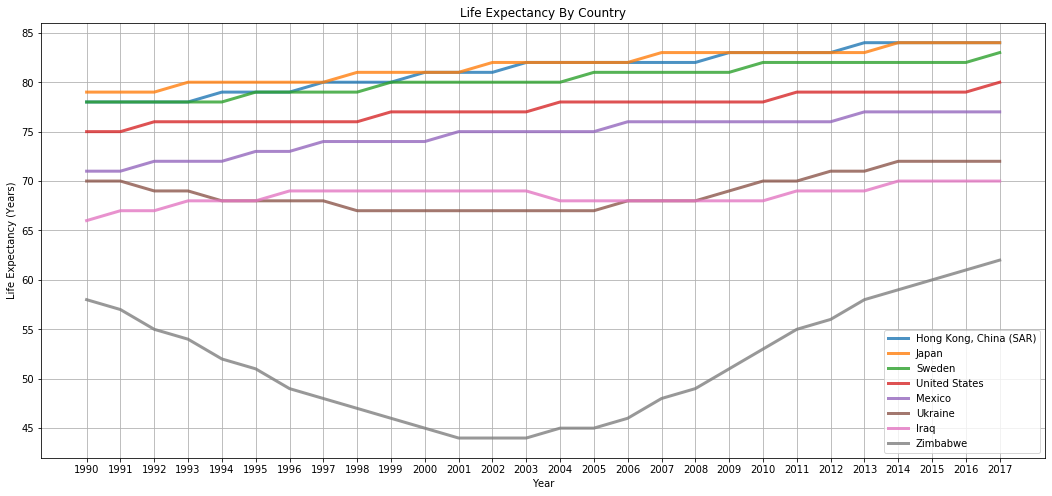

In [263]:
plt.title("Life Expectancy By Country")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Year")
plt.grid()

years = df.columns.tolist()
countries =  ['Hong Kong, China (SAR)','Japan','Sweden','United States','Mexico','Ukraine','Iraq','Zimbabwe']

for cnt in countries:
    le_vals = df.loc[cnt,:].tolist()
    le_vals = [round(float(x)) for x in le_vals]
    plt.plot(years, le_vals, label=cnt, alpha=0.8, linewidth=3)

plt.legend(loc="best",labels=countries)
plt.rcParams["figure.figsize"] = [18,8]

plt.show()

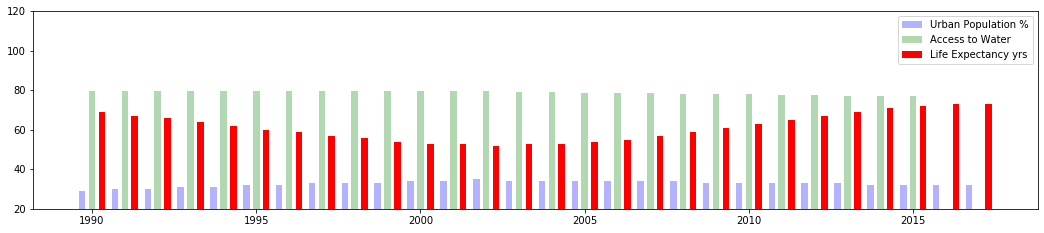

In [314]:
# What characteristics cause higher or lower life expectancy in certain countries
country = "Zimbabwe"
plt.title("Causes of Higher Life Expectancy in "+country)
plt.ylabel("Y Label")
plt.xlabel("Year")
plt.grid()

#get maximum age for the selected country (this will be our 100% reference)
max_all_countries = df['2017'].max()

le_vals = df.loc[country,:].tolist()
le_vals = [  round( float(x) / max_all_countries * 100 ) for x in le_vals]

df_urban = pd.read_csv("Resources/Urban_Majority.csv")
df_urban = df_urban.set_index("Countries")
urban_vals  = df_urban.loc[country,:][years].tolist()
urban_vals = [round(float(x)) for x in urban_vals]

df_water = pd.read_csv("Resources/Access_To_Drinking_Water.csv")
water_years = ['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015']
df_water = df_water.loc[(df_water["Countries"] == country),:][water_years]
df_water['2016'] = 00.00
df_water['2017'] = 00.00
water_vals = df_water.values.tolist()[0]

ax = plt.subplot(211)
ax.set_ylim([20, 120])

xpos1 = [(int(x) -0.3) for x in years]
xpos2 = [int(x) for x in years]
xpos3 = [(int(x) +0.3) for x in years]

ax.bar(xpos1, urban_vals, width=0.2, color='b', align='center',label="Urban Population %",alpha=0.3)
ax.bar(xpos2, water_vals, width=0.2, color='g', align='center',label="Access to Water",alpha=0.3)
ax.bar(xpos3, le_vals, width=0.2, color='r', align='center',label="Life Expectancy yrs")

ax.legend(loc="best")

plt.show()